# Time Series and Forecasting

Import data and set libraries

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm 
import matplotlib

In [2]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_excel("superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Let's make the time series and forecasting for furniture sales, and see that we have 4 years worth of data

In [4]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max(), 

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Data Preprocessing

In [5]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [6]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis = 1, inplace = True)
furniture = furniture.sort_values('Order Date')

furniture.isnull().sum()
furniture.dtypes

Order Date    datetime64[ns]
Sales                float64
dtype: object

In [7]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [8]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

We will use the averages daily sales value for month, and using the start of each month as timestamp

In [9]:
y = furniture['Sales'].resample('MS').mean()

Quick peek of 2017 surniture sales

In [10]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

### Visualize Furniture Sales Time Series Data

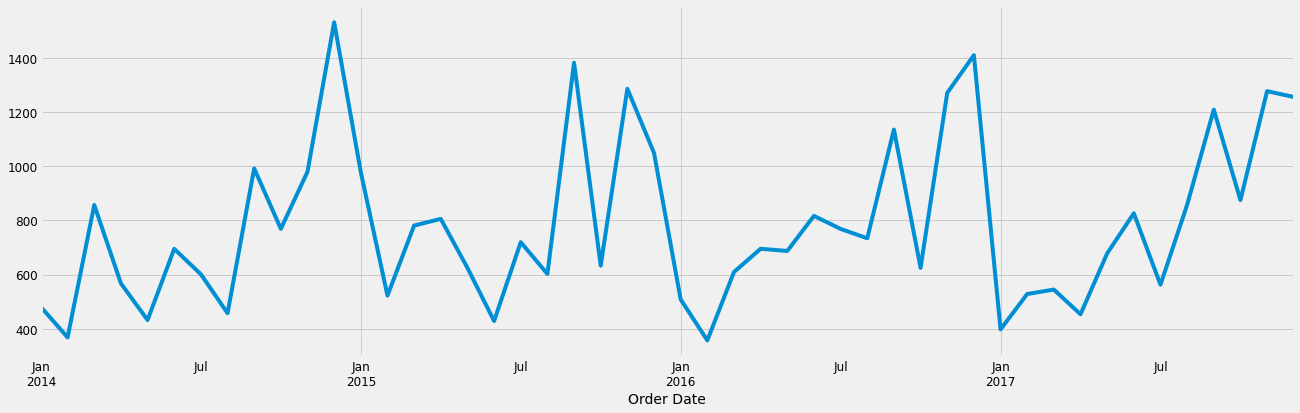

In [11]:
y.plot(figsize=(20, 6))
plt.show()

Watching that there are high seasons at the end of the year and low seasons at the beginning of the year we can make a time-series decomposition with 3 distinct components in mind: trens, seasonality and noise.

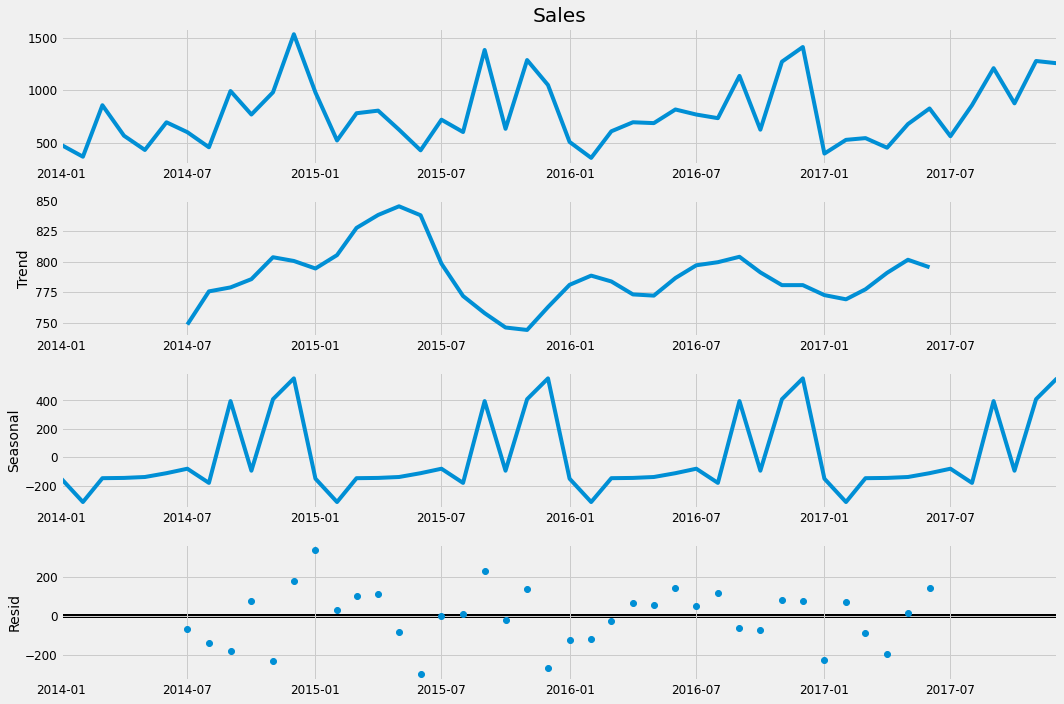

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

## Time series forecasting with ARIMA

ARIMA = Autoregressive Integrated Moving Average. The 3 requiered parameters are **p** (seasonality), **d** (trend) and **q** (noise in data).

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


The goal is use a "grid search" to find the optimal set of parameters that yields the best performance for the model

In [40]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1797.6482321691446
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028999297056
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337


/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:611.13855979451
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803673495
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758096
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2956.4611861737326
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091676
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896730426
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.54560507649404
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2658.3348015284078
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769277646


/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255765310897
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1324.2378377099187
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.96712281714713
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1408.4055092513686
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.91132002150783
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176709429
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2568.959531881355
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548483838
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806231718204
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977439793


/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2471.8286566810502
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417114
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621506612
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1228.819535865297
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751651835
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679353877


/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1123.6722540750482
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750655816
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692186995
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442580288
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2704.933199312833


/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36379856586956
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.34221949677874
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763324070289
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:397613.9497581995
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:304.3753786470215
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131882956646
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:745.9487702168187
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134


/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.21306116144194
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036585859474
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1017.2971619375546


/Users/who/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.62709013121065
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.32649925918236
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019776388
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2570.663277718183
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687397344
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006930311
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546585905
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:8385.255981687498
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.787543992009
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.36610150206025


Output suggests that SARIMAX(1,1,1)x(1,1,0,12) yields the lowest AIC of 283.3661. Let's consider this the optimal

## Fitting the ARIMA model

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                               order = (1, 1, 1),
                               seasonal_order = (1, 1, 0, 12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


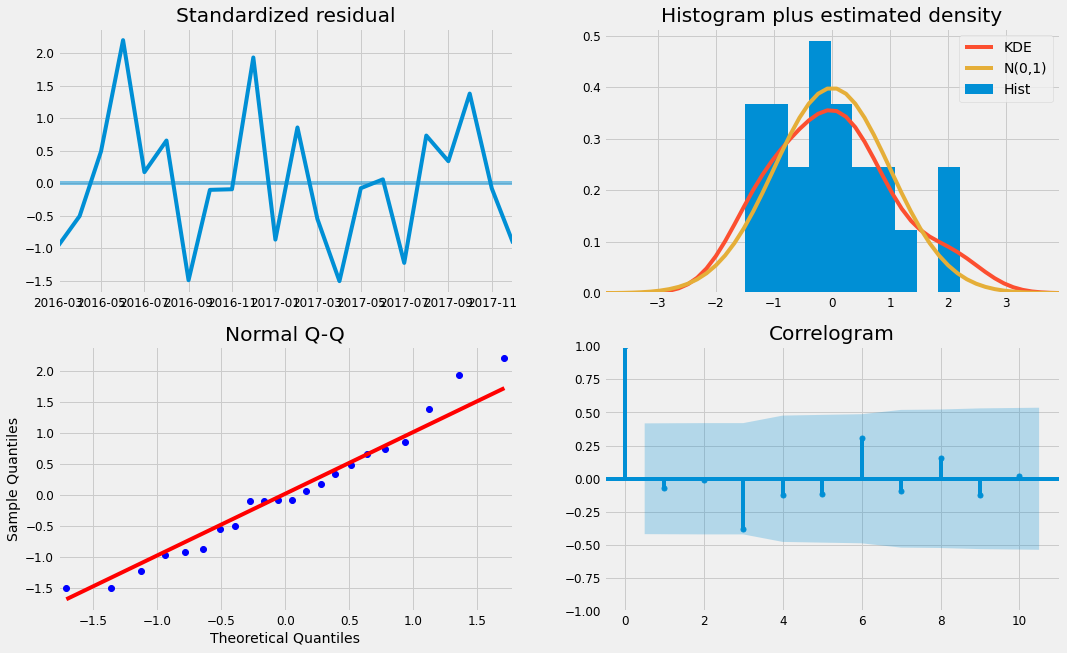

In [44]:
results.plot_diagnostics(figsize=(16,10))
plt.show()

## Validating forecasts

Compare predicted sales to real sales of the time series. Forecasts goes from 2017-01-01 to the end of the data.

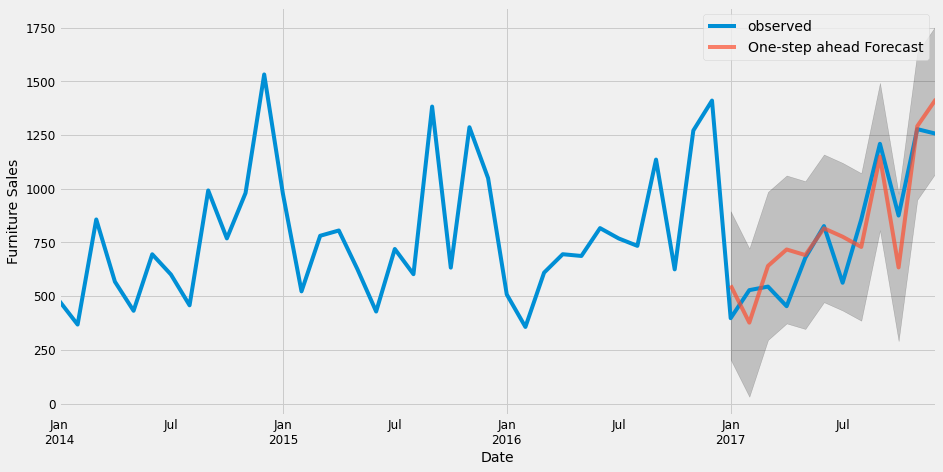

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14,7))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [47]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

mse =  ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecast is {}'.format(round(np.sqrt(mse),2)))

The Root Mean Squared Error of our forecast is 151.64


Root Mean Squared Error: https://en.wikipedia.org/wiki/Root-mean-square_deviation

Source:
- Dataset: https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls
- Project: https://www.kdnuggets.com/2018/09/end-to-end-project-time-series-analysis-forecasting-python.html